## Package Imports

In [15]:
import os
import pandas as pd

## Local Imports

In [16]:
from clock.config import connect

## Configuration

In [17]:
%load_ext autoreload
#%autoreload 0 # -- Default
#%autoreload 1 # --Only auto-reload modules imported using aimport
%autoreload 2 # --Auto-reload all modules



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
engine, session = connect()

In [19]:
sql = '''
with frequency as (
    select total_days
         , count(employee_id) as frequency
    from attendance
    group by total_days
    order by total_days
), add_bins as (
    select case
               when total_days >= 240 and total_days <= 249 then '240-249'
               when total_days >= 250 and total_days <= 259 then '240-259'
               when total_days >= 260 and total_days <= 269 then '260-269'
               when total_days >= 270 and total_days <= 279 then '270-279'
               when total_days >= 280 and total_days <= 289 then '280-289'
               when total_days >= 290 and total_days <= 299 then '290-299'
               when total_days > 300 then '300+'
        end as bin
         , frequency
    from frequency
)
select bin
     , sum(frequency) as frequency
from add_bins
group by bin;

'''
df = pd.read_sql_query(sql, con=engine)

Attendance here is defined as someone who shows up for work in a given day, even if it is for
only a few minutes.  We can see that this follows a normal distribution, centered around the 270
 days of total attendance, with a few in the 240s and >300:

<AxesSubplot:xlabel='bin'>

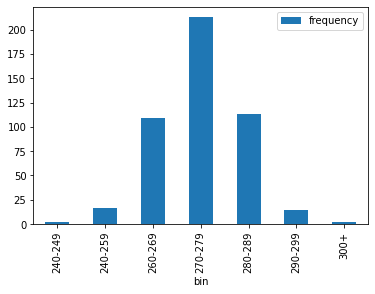

In [20]:
df.plot(x='bin', y='frequency', kind='bar')

We can take a look at the top 25 performers and see that universally they had 1100+ hours per year.

In [21]:
sql = '''
select employee_id
      , yearly_floor_time_hours
     , rank_best
from best_worst_25
where rank_best <= 25
order by rank_best;
'''
df = pd.read_sql_query(sql, con=engine)

In [22]:
df

,employee_id,yearly_floor_time_hours,rank_best
0,447,1204,1
1,302,1202,2
2,340,1195,3
3,16,1183,4
4,104,1168,5
5,26,1166,6
6,453,1165,7
7,372,1154,8
8,316,1151,9
9,417,1151,10


<AxesSubplot:xlabel='rank_best'>

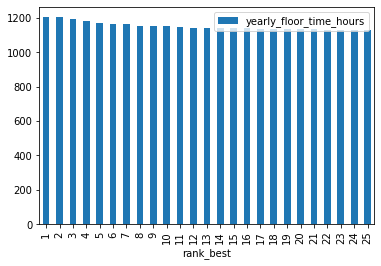

In [23]:
df.plot(x='rank_best', y='yearly_floor_time_hours', kind='bar')

In [24]:
sql = '''
select employee_id
      , yearly_floor_time_hours
from best_worst_25
where rank_worst <= 25;
'''


We can take a look at the bottom 25 performers and see that there was little variance from
person-to-person; all had around 900-1000 hours annually:

In [25]:
sql = '''
select employee_id
      , yearly_floor_time_hours
     , rank_worst
from best_worst_25
where rank_worst <= 25
order by rank_worst;
'''
df = pd.read_sql_query(sql, con=engine)

In [26]:
df

,employee_id,yearly_floor_time_hours,rank_worst
0,404,926,1
1,267,928,2
2,341,940,3
3,421,940,4
4,12,946,5
5,369,953,6
6,301,953,7
7,60,961,8
8,458,963,9
9,442,965,10


<AxesSubplot:xlabel='rank_worst'>

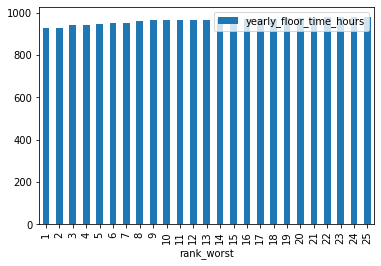

In [27]:
df.plot(x='rank_worst', y='yearly_floor_time_hours', kind='bar')

In [28]:
sql = '''
select employee_id
      , yearly_floor_time_hours
from best_worst_25
where rank_worst <= 25;
'''